<a href="https://colab.research.google.com/github/muralianamala/pythonlearning/blob/main/clt_ci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/126/original/weight-height.csv?1684995383 -O weight-height.csv

--2024-02-16 15:51:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/126/original/weight-height.csv?1684995383
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.160.146.106, 18.160.146.28, 18.160.146.45, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.160.146.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [text/plain]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2024-02-16 15:51:01 (9.96 MB/s) - ‘weight-height.csv’ saved [428120/428120]



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df_hw = pd.read_csv('weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df_height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

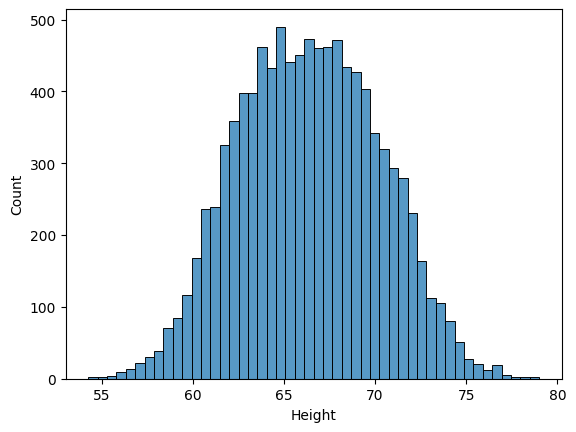

In [ ]:
sns.histplot(df_height)

In [ ]:
mu = df_height.mean()
mu

66.36755975482124

In [ ]:
df_height.sample(5)

1319    70.404436
2945    69.893151
1508    69.922810
6604    67.742901
3889    64.117892
Name: Height, dtype: float64

In [ ]:
np.mean(df_height.sample(5))

65.77046102855567

In [ ]:
sample_5 = [np.mean(df_height.sample(5)) for i in range(10000) ]

<Axes: ylabel='Count'>

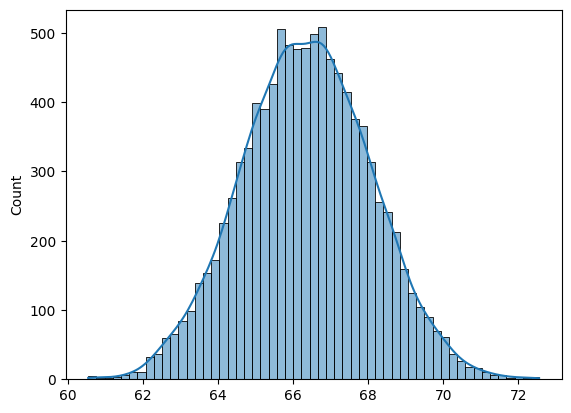

In [ ]:
sns.histplot(sample_5, kde=True)

In [ ]:
np.mean(sample_5)

66.35501109268516

In [ ]:
#Sample size : 20
sample_20 = [np.mean(df_height.sample(20)) for i in range(10000) ]

<Axes: ylabel='Count'>

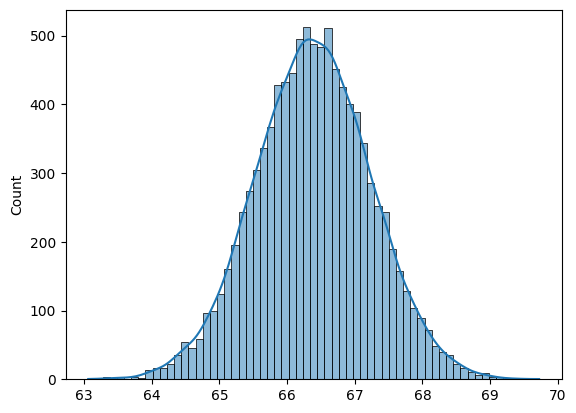

In [ ]:
sns.histplot(sample_20, kde=True)

In [ ]:
np.mean(sample_20)

66.38453525739757

In [ ]:
# population mean
mu = df_height.mean()

# population SD
sigma = df_height.std()

# mean of sample distributions having sample size = 5
mu_5 = np.mean(sample_5)

# SD of sample distributions having sample size = 5
sigma_5 = np.std(sample_5)

# mean of sample distributions having sample size = 20
mu_20 = np.mean(sample_20)

# SD of sample distributions having sample size = 20
sigma_20 = np.std(sample_20)

In [ ]:
print(mu, mu_5, mu_20)
print(sigma, sigma_5, sigma_20)

66.36755975482124 66.35501109268516 66.38453525739757
3.8475281207732293 1.720027769688883 0.850858153219157


In [ ]:
'''
Systolic blood pressure of a group of people is known to have an average of 122 mmHg
and a standard deviation of 10 mmHg.
Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.
'''

In [ ]:
se = 2.5
z = (125 - 122)/se
z

1.2

In [ ]:
ans = 1 - norm.cdf(z)
print(ans)

0.11506967022170822


In [ ]:
'''
Weekly toothpaste sales have a mean 1000 and std dev 200. Sample is taken of size 4.
What is the probability that the average weekly sales next month is more than 1110?

'''

In [ ]:
import math as m

mu = 1000
sd = 200
n = 4
x = 1110

se = sd/m.sqrt(n)
se

z = (x-mu)/se

ans = 1- norm.cdf(z)

print(ans)

0.13566606094638267


In [ ]:
'''
In an e-commerce website, the average purchase amount per customer is $80 with a standard deviation of $15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be less than $75?

'''

In [ ]:
mu = 80
sd = 15
n = 50
x = 75

se = sd/m.sqrt(n)
z = (x - mu)/se

ans = norm.cdf(z)
print(ans)

0.009211062727049501


In [ ]:
'''
From a sample of 80 endangered birds,
the average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.
What is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.
'''

In [ ]:
mu = 45
sd = 10
n = 80

z1 = norm.ppf(0.05)
z2 = norm.ppf(1-0.05)

se = sd/m.sqrt(n)

x1 = mu + z1*se
x2 = mu + z2*se

(x1, x2)

(43.16099773854971, 46.83900226145029)

In [ ]:
norm.interval(0.9, loc = mu, scale = se)

(43.16099773854971, 46.83900226145029)

In [ ]:
'''
In a software project, the team estimates bug resolution time at an average of 6 hours
with a standard deviation of 2 hours.
To estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.
What is the correct confidence interval?

'''

In [ ]:
mu = 6
sd = 2
n = 25

z1 = norm.ppf(0.005)
z2 = norm.ppf(1 - 0.005)


se = sd/m.sqrt(n)

x1 = mu + z1*se
x2 = mu + z2*se

(x1, x2)

(4.969668278580439, 7.03033172141956)

In [ ]:
norm.interval(0.99, loc = mu, scale = se)

(4.96966827858044, 7.03033172141956)

In [ ]:
# define function calc_CI

def calc_CI(mean, std, N, confidence):

  # let's calc std error
  std_err = std / np.sqrt(N)
  print("SE ",std_err)

  # calculate the remaining fractions beyond interval (we know 90% so fractions will be 5% each so 0.05)
  slice = (1 - (confidence/100))/2
  print("Slice ",slice)

  # let's calculate z1 and z2
  z1 = norm.ppf(slice)
  z2 = norm.ppf(1-slice)

  print("z1 z2", z1, z2)

  # calculate end points
  x1 = mean + (z1 * std_err)
  x2 = mean + (z2 * std_err)

  return x1, x2


In [ ]:
calc_CI(6, 2, 25, 99)

SE  0.4
Slice  0.0050000000000000044
z1 z2 -2.5758293035489004 2.5758293035489004


(4.96966827858044, 7.03033172141956)

In [ ]:
#Bootstrapping #Sample with replacement
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [ ]:
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
bootstrapped_samples
# np.mean(bootstrapped_samples)

array([35, 36, 37, 35, 37, 35])

In [ ]:
bootstrapped_means_survey_1 = []
n = 6
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)

<Axes: ylabel='Count'>

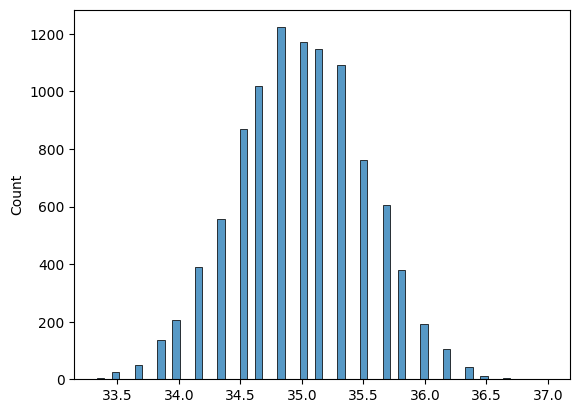

In [ ]:
sns.histplot(bootstrapped_means_survey_1)

In [ ]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5)
x1

34.0

In [ ]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)
x2

36.0

In [ ]:
(x1, x2)

(34.0, 36.0)